### Visualization (시각화)

<img src="./images/visual01.png" width="600" style="margin-left:0">
<img src="./images/visual02.png" width="600" style="margin-left:0">
<img src="./images/visual03.png" width="600" style="margin-left:0">

#### 범주형(상품 카테고리: 생활용품, 전제제품, 의류, 학생 수준: High, Medium, Low, 측정년도: 2021. 2022, ....)
- 바이올린 차트
- 스캐터 플롯
- 막대 차트
- 누적 막대 차트

##### 수치형(학번: 1, 2,..., 구매 횟수: 157, 789,... , 가격: 1280.156489, ..., 식물의 높이: 10.251,...)
- 막대 차트(숫자가 적을 경우)
- 선 그래프(숫자가 많을 경우)
- 바이올린 차트
- 스캐터 플롯
- 히스토그램
- KDE

In [1]:
import pandas as pd

t_df = pd.read_csv("./datasets/titanic.csv")
t_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
t_df[['Age']].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,891.0,29.699118,13.002015,0.42,22.0,29.699118,35.0,80.0


In [12]:
t_df.groupby('Pclass').max('Age')

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,890,1,80.0,3,4,512.3292
2,887,1,70.0,3,3,73.5000
3,891,1,74.0,8,6,69.5500


In [2]:
t_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [3]:
t_df.Age = t_df.Age.fillna(t_df.Age.mean())

In [4]:
t_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

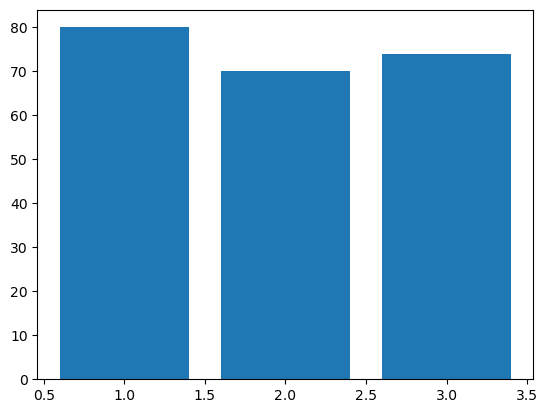

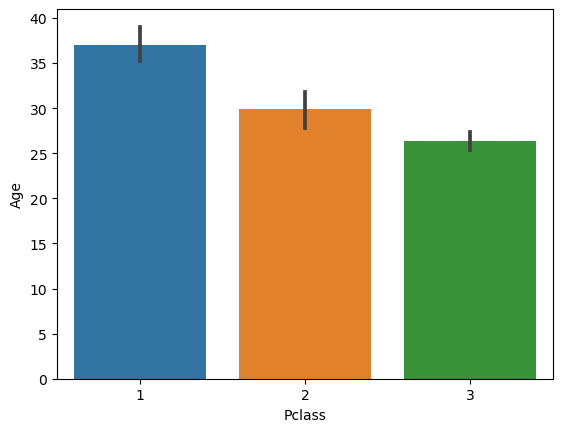

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# height는 max 값이다.
plt.bar(x=t_df.Pclass, height=t_df.Age)
plt.show()


sns.barplot(x='Pclass', y='Age', data=t_df)
plt.show()

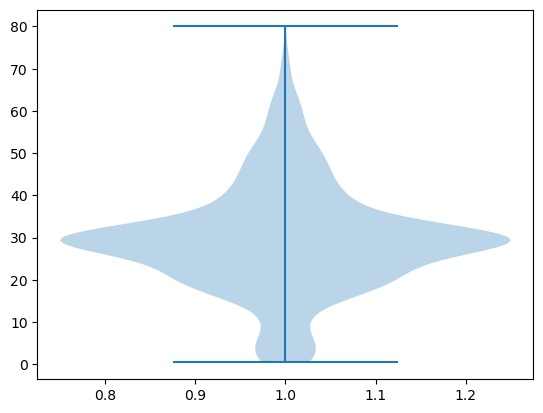

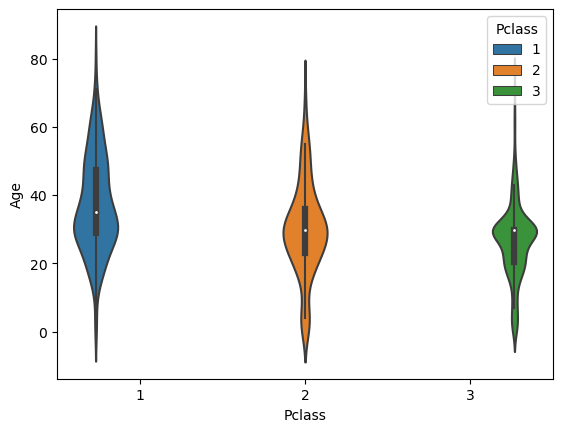

In [24]:
plt.violinplot(t_df.Age)
plt.show()

# hue로 설정할 feature를 x축으로 설정하면, 여러 개의 군집을 한꺼번에 볼 수 있다.
sns.violinplot(x='Pclass', y='Age' , hue='Pclass', data = t_df)
plt.show()

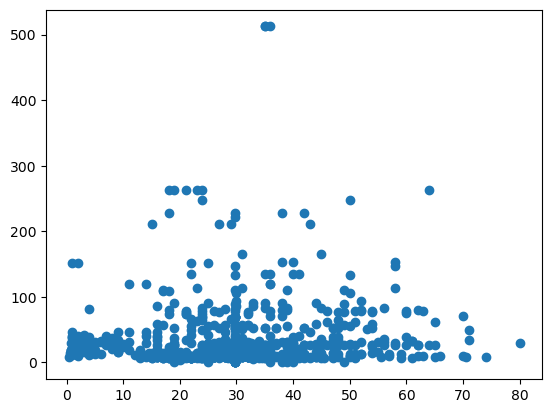

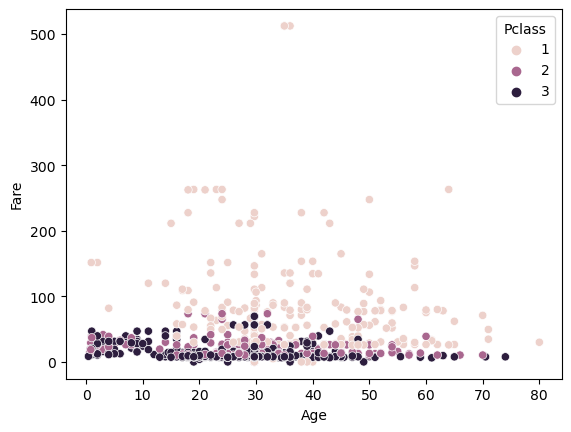

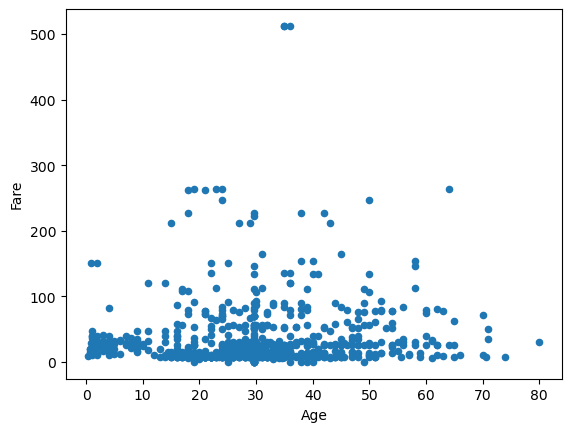

In [32]:
plt.scatter(x= t_df.Age, y=t_df.Fare)
plt.show()


sns.scatterplot(x='Age', y='Fare', hue='Pclass', data = t_df)
plt.show()


t_df.plot(x='Age', y='Fare', kind= 'scatter')
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


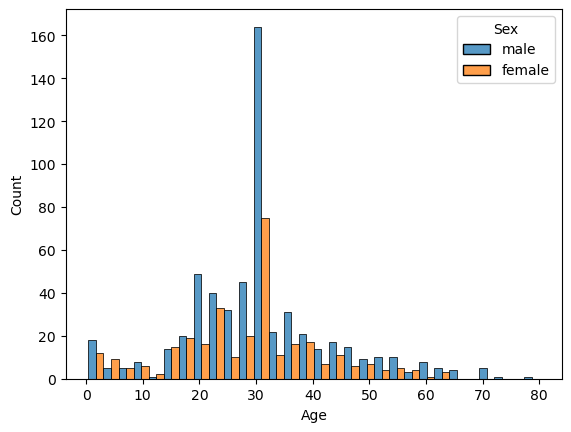

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


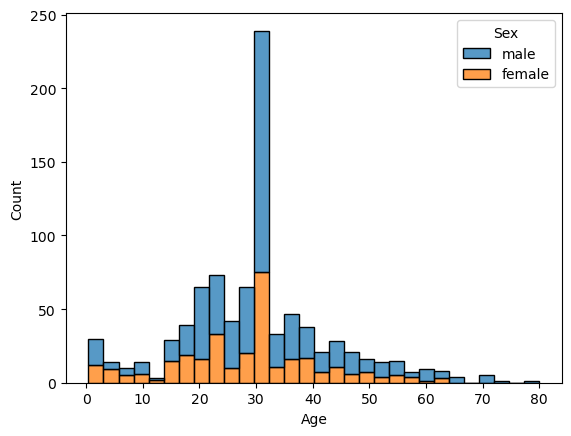

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


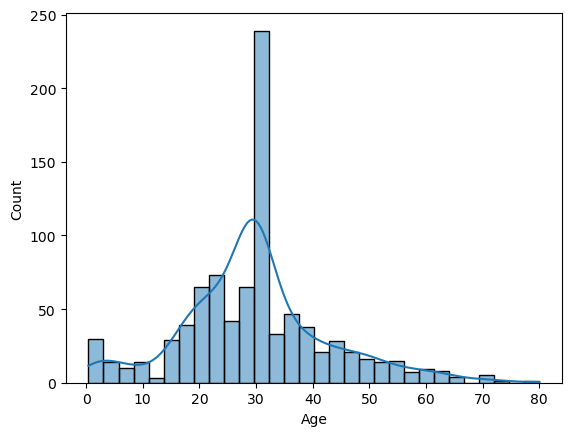

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# y축은 count 이다.
sns.histplot(x='Age', data=t_df, hue='Sex', multiple='dodge')
plt.show()

sns.histplot(x='Age', data=t_df, hue='Sex', multiple='stack')
plt.show()

sns.histplot(x='Age', data=t_df, kde=True)
plt.show()

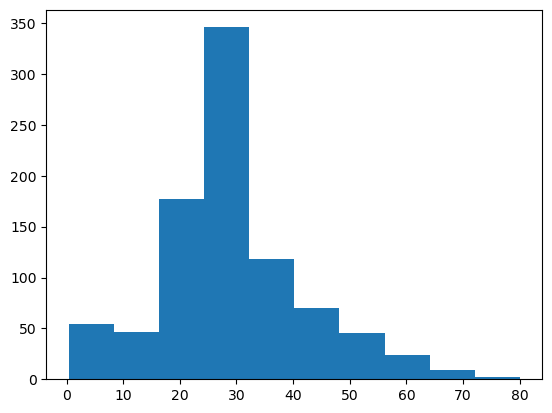

C:\Users\Administrator\AppData\Local\Temp\ipykernel_7152\3914247564.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(t_df.Age, kde=True, rug=True)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_con

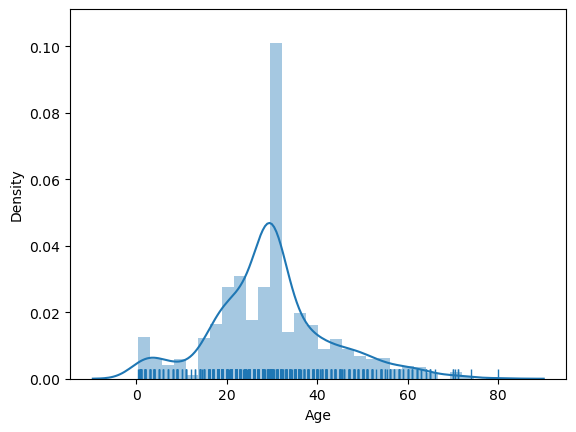

<Axes: >

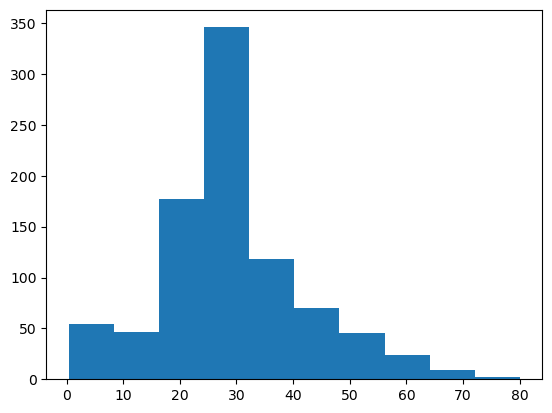

In [50]:
plt.hist(t_df.Age)
plt.show()

sns.distplot(t_df.Age, kde=True, rug=True)
plt.show()

t_df.Age.hist(grid=False)

In [51]:
import pandas as pd

a_df = pd.read_csv('./datasets/avocado.csv')
a_df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [53]:
a_df.isna().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Date', ylabel='AveragePrice'>

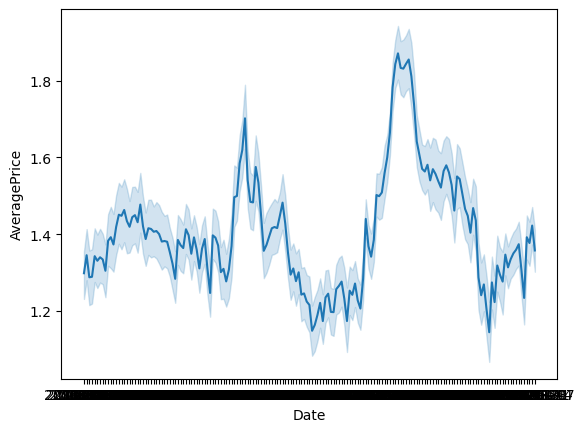

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.lineplot(x='Date', y = 'AveragePrice', data=a_df)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Administrator\AppData\Local\Temp\ipykernel_7152\3626940197.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  line.set_xticklabels(line.get_xticklabels(), rotation=45)


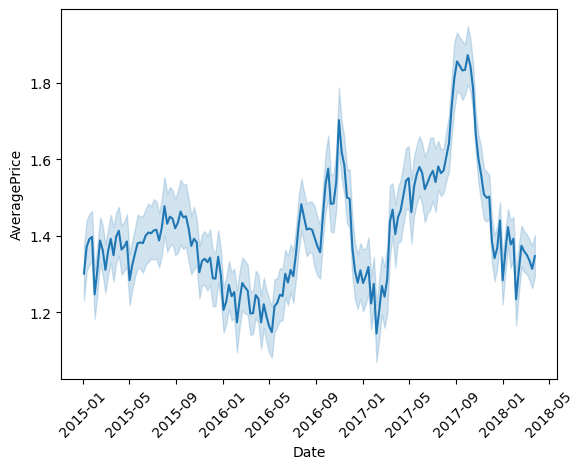

In [61]:
a_df.loc[:, 'Date'] = pd.to_datetime(a_df.Date)
line = sns.lineplot(x='Date', y ='AveragePrice', data=a_df)
line.set_xticklabels(line.get_xticklabels(), rotation=45)
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Administrator\AppData\Local\Temp\ipykernel_7152\2994722065.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  line.set_xticklabels(line.get_xticklabels(), rotation=45)


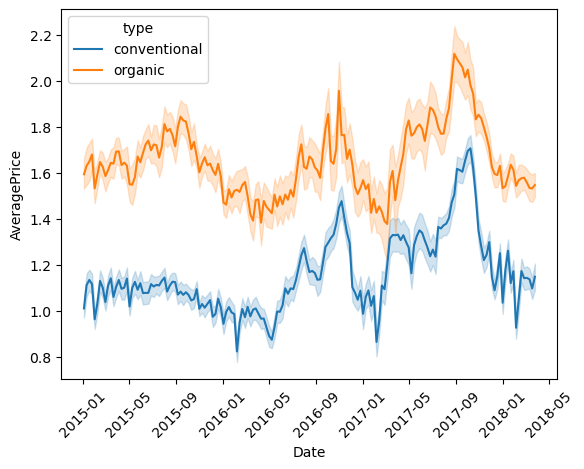

In [62]:
line = sns.lineplot(x='Date', y ='AveragePrice', hue='type', data=a_df)
line.set_xticklabels(line.get_xticklabels(), rotation=45)
plt.show()